In [57]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal
import pandas as pd
import pyaudio

plt.style.use('dark_background')

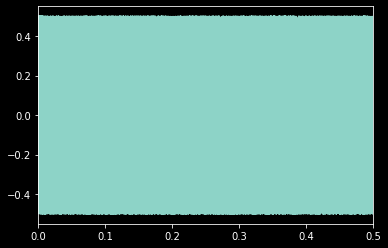

In [58]:
fs = 44100
t = np.arange(0, 2, 1/fs)
f_t = np.linspace(440, 2440, len(t))
phi_t = 2 * np.pi * np.cumsum(f_t)
s_chirp = 0.5 * np.sin(phi_t)

plt.plot(t, s_chirp)
plt.xlim(0, 0.5)
plt.show()

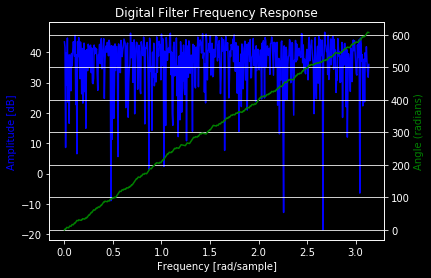

In [59]:
w, h = signal.freqz(s_chirp)

fig, ax1 = plt.subplots()
ax1.set_title('Digital Filter Frequency Response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

In [61]:
def play_audio(data, player, fs, dev=None):
    ostream = player.open(format=pyaudio.paFloat32, channels=1, rate=int(fs),output=True,output_device_index=dev)
    try:
        ostream.write(data.astype(np.float32))
    except:
        print("an error has occured")
        
p = pyaudio.PyAudio()
play_audio(s_chirp, p, fs);

In [72]:
p = pyaudio.PyAudio()

volume = 0.5     # range [0.0, 1.0]
fs = 44100       # sampling rate, Hz, must be integer
duration = 1.0   # in seconds, may be float
f = 440.0        # sine frequency, Hz, may be float

# generate samples, note conversion to float32 array
samples = (np.sin(2*np.pi*np.arange(fs*duration)*f/fs)).astype(np.float32)

# for paFloat32 sample values must be in range [-1.0, 1.0]
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=fs,
                output=True)

# play. May repeat with different volume values (if done interactively) 
stream.write(volume*samples)

stream.stop_stream()
stream.close()

p.terminate()

In [68]:
p = pyaudio.PyAudio()
for i in range(p.get_device_count()):
    print(p.get_device_info_by_index(i))

{'index': 0, 'structVersion': 2, 'name': 'Microsoft Sound Mapper - Input', 'hostApi': 0, 'maxInputChannels': 2, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.09, 'defaultLowOutputLatency': 0.09, 'defaultHighInputLatency': 0.18, 'defaultHighOutputLatency': 0.18, 'defaultSampleRate': 44100.0}
{'index': 1, 'structVersion': 2, 'name': 'Microphone (HD Web Camera)', 'hostApi': 0, 'maxInputChannels': 1, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.09, 'defaultLowOutputLatency': 0.09, 'defaultHighInputLatency': 0.18, 'defaultHighOutputLatency': 0.18, 'defaultSampleRate': 44100.0}
{'index': 2, 'structVersion': 2, 'name': 'What U Hear (Sound Blaster Reco', 'hostApi': 0, 'maxInputChannels': 6, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.09, 'defaultLowOutputLatency': 0.09, 'defaultHighInputLatency': 0.18, 'defaultHighOutputLatency': 0.18, 'defaultSampleRate': 44100.0}
{'index': 3, 'structVersion': 2, 'name': 'Microphone (Steam Streaming Mic', 'hostApi': 0, 'maxInputChannels':